In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NE_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1,1.0,1.0,NaN,0.0,0.0,0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,2.0,NaN
1,1.0,1,2.0,0.0,NaN,NaN,3.0,0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,2.0,2.0,0.0,7.0
2,2.0,2,NaN,0.0,0.0,NaN,3.0,0,2.0,NaN,...,0.0,NaN,0.0,2.0,0.0,3.0,NaN,2.0,0.0,7.0
3,NaN,2,2.0,1.0,0.0,0.0,2.0,0,2.0,2.0,...,0.0,0.0,NaN,2.0,0.0,2.0,NaN,NaN,NaN,7.0
4,2.0,2,1.0,0.0,0.0,0.0,2.0,0,NaN,0.0,...,0.0,0.0,NaN,3.0,0.0,NaN,2.0,2.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2,0.0,2.0,1.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,NaN
354,2.0,3,NaN,NaN,0.0,NaN,0.0,0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,70.0
355,NaN,2,2.0,1.0,0.0,NaN,0.0,0,0.0,0.0,...,0.0,NaN,0.0,2.0,0.0,0.0,NaN,2.0,0.0,70.0
356,2.0,1,0.0,3.0,NaN,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	70
int64		column 2	0
float64		column 3	105
float64		column 4	70
float64		column 5	70
float64		column 6	70
float64		column 7	35
int64		column 8	0
float64		column 9	106
float64		column 10	106
float64		column 11	106
float64		column 12	141
int64		column 13	0
float64		column 14	71
float64		column 15	105
float64		column 16	70
float64		column 17	71
float64		column 18	35
float64		column 19	35
float64		column 20	71
float64		column 21	106
float64		column 22	106
float64		column 23	106
float64		column 24	35
float64		column 25	71
float64		column 26	35
float64		column 27	106
float64		column 28	35
float64		column 29	36
float64		column 30	71
float64		column 31	71
float64		column 32	141
float64		column 33	71
float64		column 34	70


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,288.000000,358.000000,253.000000,288.000000,288.000000,288.000000,323.000000,358.000000,252.000000,252.000000,...,287.000000,323.000000,252.000000,323.000000,322.000000,287.000000,287.000000,217.000000,287.000000,288.000000
mean,2.090278,1.807263,1.612648,1.329861,0.607639,0.461806,0.176471,0.379888,0.591270,0.484127,...,0.355401,0.479876,0.424603,0.931889,0.453416,0.062718,0.083624,1.912442,0.550523,36.236111
std,0.600965,0.701541,0.831043,1.110079,0.884759,0.969176,0.581659,0.837388,0.950782,0.862999,...,0.801548,0.882225,0.922424,1.112467,0.950162,0.328544,0.409644,0.515215,1.104690,14.738362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

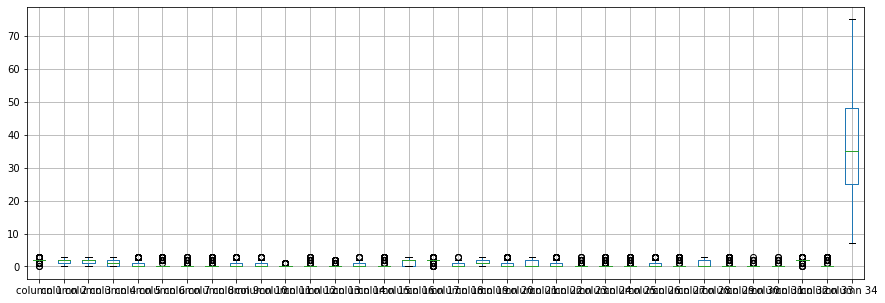

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.090278
column 2      1.807263
column 3      1.612648
column 4      1.329861
column 5      0.607639
column 6      0.461806
column 7      0.176471
column 8      0.379888
column 9      0.591270
column 10     0.484127
column 11     0.111111
column 12     0.276498
column 13     0.142458
column 14     0.547038
column 15     0.256917
column 16     1.354167
column 17     1.937282
column 18     0.498452
column 19     1.294118
column 20     0.623693
column 21     0.944444
column 22     0.543651
column 23     0.214286
column 24     0.349845
column 25     0.355401
column 26     0.479876
column 27     0.424603
column 28     0.931889
column 29     0.453416
column 30     0.062718
column 31     0.083624
column 32     1.912442
column 33     0.550523
column 34    36.236111
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.408523,0.210054,0.009480,0.025697,0.015086,-0.114956,-0.029595,0.154141,0.224270,...,-0.026768,0.155137,-0.007134,0.047604,-0.072310,-0.022155,-0.052313,0.108168,-0.042706,-0.000877
column 2,0.408523,1.000000,0.305253,-0.066934,-0.010264,-0.067848,-0.093761,-0.084815,0.221648,0.297711,...,-0.141806,0.184081,-0.124539,0.011366,-0.155578,0.023885,-0.002831,-0.004723,-0.149884,0.058615
column 3,0.210054,0.305253,1.000000,-0.053310,0.220223,0.383647,-0.140586,0.317701,0.235598,0.363651,...,0.258408,0.345440,0.310591,-0.287468,0.244424,-0.131127,-0.127175,0.094655,0.317572,0.171633
column 4,0.009480,-0.066934,-0.053310,1.000000,0.292246,0.430896,-0.176739,0.390798,-0.394032,-0.139419,...,0.376377,-0.178007,0.453459,-0.021599,0.376199,-0.101000,-0.121437,0.086441,0.425261,0.063436
column 5,0.025697,-0.010264,0.220223,0.292246,1.000000,0.373560,-0.179123,0.349561,-0.063487,0.013558,...,0.364594,-0.040159,0.306489,-0.050522,0.323888,-0.113244,-0.144388,0.119976,0.377844,0.111700
column 6,0.015086,-0.067848,0.383647,0.430896,0.373560,1.000000,-0.134082,0.865579,-0.263171,-0.244154,...,0.877958,-0.120457,0.939146,0.073664,0.896741,-0.069377,-0.091670,0.200332,0.900479,0.080028
column 7,-0.114956,-0.093761,-0.140586,-0.176739,-0.179123,-0.134082,1.000000,-0.136183,0.280865,-0.051694,...,-0.112699,-0.163844,-0.143154,0.032733,-0.148548,0.717546,0.743171,-0.030091,-0.129628,-0.411871
column 8,-0.029595,-0.084815,0.317701,0.390798,0.349561,0.865579,-0.136183,1.000000,-0.295321,-0.263276,...,0.871883,-0.127995,0.880485,0.124121,0.869519,-0.055433,-0.095851,0.172365,0.899465,0.093493
column 9,0.154141,0.221648,0.235598,-0.394032,-0.063487,-0.263171,0.280865,-0.295321,1.000000,0.602115,...,-0.256307,0.437128,-0.264360,-0.403624,-0.282584,0.235911,0.252162,-0.167063,-0.281968,-0.113829
column 10,0.224270,0.297711,0.363651,-0.139419,0.013558,-0.244154,-0.051694,-0.263276,0.602115,1.000000,...,-0.237977,0.526503,-0.268094,-0.443927,-0.260918,0.028291,-0.045531,-0.044018,-0.248856,0.031514


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+90,34+90+90,34+90+90+90,34+90+90+90+90,34+90+90+90+90+90,34+90+90+90+90+90+90,34+90+90+90+90+90+90+90,34+90+90+90+90+90+90,34+90+90+90+90+90,34+90+90+90+90,34+90+90+90,34+90+90,34+90,34], vae_layer = False, seed = 90)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.98898194052956
Epoch: 1 , loss: 59.80800524624911
Epoch: 2 , loss: 59.61220567876642
Epoch: 3 , loss: 59.70591319691051
Epoch: 4 , loss: 58.22224807739258
Epoch: 5 , loss: 56.56287175958807
Epoch: 6 , loss: 55.45913297479803
Epoch: 7 , loss: 54.825248371471055
Epoch: 8 , loss: 54.68046881935813
Epoch: 9 , loss: 53.96236506375399
Epoch: 10 , loss: 53.6039947162975
Epoch: 11 , loss: 53.50776620344682
Epoch: 12 , loss: 52.84430503845215
Epoch: 13 , loss: 52.64844166148793
Epoch: 14 , loss: 52.26034597917037
Epoch: 15 , loss: 52.60700919411399
Epoch: 16 , loss: 51.88799858093262
Epoch: 17 , loss: 51.94482907381925
Epoch: 18 , loss: 51.3491658297452
Epoch: 19 , loss: 51.11705988103693
Epoch: 20 , loss: 51.33834179964933
Epoch: 21 , loss: 51.06414638866078
Epoch: 22 , loss: 50.82520363547585
Epoch: 23 , loss: 50.66543249650435
Epoch: 24 , loss: 49.856371272693984
Epoch: 25 , loss: 49.87439623746005
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      2.345060
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.225777
column 13     0.000000
column 14     0.564526
column 15     0.000000
column 16     1.726602
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.800973
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     2.792842
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.000000,0,0.000000,0.000000,-0.026777,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,-0.132046,0.000000,2.717754,0.000000,46.297981
1,0.000000,0,0.000000,0.000000,0.486880,0.336894,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,-2.123613,0.000000,0.000000,0.000000,0.000000
2,0.000000,0,0.104569,0.000000,0.000000,0.213537,0.0,0,0.000000,0.221179,...,0.0,0.280519,0.000000,0.0,0.0,0.000000,-2.981403,0.000000,0.000000,0.000000
3,-0.915086,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.106066,0.0,0.0,0.000000,-1.988372,-0.983660,0.162801,0.000000
4,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0,-1.426205,0.000000,...,0.0,0.000000,0.415110,0.0,0.0,-2.168736,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,-28.459938
354,0.000000,0,0.055180,1.730052,0.000000,0.320101,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.717348,0.000000,0.000000
355,0.323255,0,0.000000,0.000000,0.000000,0.370203,0.0,0,0.000000,0.000000,...,0.0,0.496008,0.000000,0.0,0.0,0.000000,0.063535,0.000000,0.000000,0.000000
356,0.000000,0,0.000000,0.000000,0.549195,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.813206,0.000000,-34.659904


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(180.7142296522603, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.23838645555383495

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      1.641232
column 4      1.370501
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.207021
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     0.630969
column 22     0.000000
column 23     0.000000
column 24     0.372142
column 25     0.000000
column 26     0.425253
column 27     0.638362
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.666983
column 34    22.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.000000,1,1.000000,1.000000,0.973223,0.000000,0.0,0,2.000000,2.000000,...,0.0,0.000000,0.000000,0.0,0.0,-0.132046,0.000000,2.717754,2.000000,46.297981
1,1.000000,1,2.000000,0.000000,0.486880,0.336894,3.0,0,3.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,-0.123613,2.000000,2.000000,0.000000,7.000000
2,2.000000,2,1.104569,0.000000,0.000000,0.213537,3.0,0,2.000000,0.221179,...,0.0,0.280519,0.000000,2.0,0.0,3.000000,0.018597,2.000000,0.000000,7.000000
3,1.084914,2,2.000000,1.000000,0.000000,0.000000,2.0,0,2.000000,2.000000,...,0.0,0.000000,0.106066,2.0,0.0,2.000000,0.011628,1.016340,0.162801,7.000000
4,2.000000,2,1.000000,0.000000,0.000000,0.000000,2.0,0,0.573795,0.000000,...,0.0,0.000000,0.415110,3.0,0.0,-0.168736,2.000000,2.000000,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,2,0.000000,2.000000,1.000000,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,3.0,0.0,0.000000,0.000000,3.000000,0.000000,41.540062
354,2.000000,3,2.055180,1.730052,0.000000,0.320101,0.0,0,3.000000,2.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.717348,0.000000,70.000000
355,2.323255,2,2.000000,1.000000,0.000000,0.370203,0.0,0,0.000000,0.000000,...,0.0,0.496008,0.000000,2.0,0.0,0.000000,0.063535,2.000000,0.000000,70.000000
356,2.000000,1,0.000000,3.000000,0.549195,0.000000,0.0,0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.813206,0.000000,35.340096


In [20]:
imputations[-1].to_excel("DERM_NE_20(imp).xlsx", index=False, header=False)